# Elijah Sartin and Richard Osborn
## DS160 Final Project Data Set
### Version 0.0.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Linear Regression (for comparison)
from sklearn.linear_model import LinearRegression

#Support Vector Machine
from sklearn import svm

#Provides a way to split the data into train and test data sets.
from sklearn.model_selection import train_test_split 

#Provides a way to calculate metrics on the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.metrics import roc_curve,  roc_auc_score

In [35]:
df=pd.read_csv('bank-additional.csv',sep=';')

In [84]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
1946,26,admin.,married,high.school,no,yes,no,cellular,nov,fri,338,1,yes
2143,49,technician,married,university.degree,no,no,no,telephone,may,mon,107,3,no
3329,32,management,single,university.degree,no,no,no,cellular,jul,fri,221,4,no
2014,36,blue-collar,single,basic.6y,no,no,no,cellular,nov,tue,238,1,yes
1211,27,blue-collar,single,basic.9y,no,no,yes,telephone,jun,thu,869,2,no


In [37]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [38]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

We are dropping columns that we were not going to be using for testing, this will allow our data to proccess faster and clean the data.

In [39]:
df.drop(df.columns[12:20],axis=1,inplace=True)

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'y'],
      dtype='object')

Text(0, 0.5, 'Number of Clients')

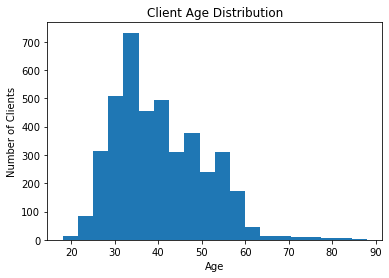

In [43]:
plt.hist(df.age,bins=20)
plt.title('Client Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Clients')

Text(0, 0.5, 'Number of Clients')

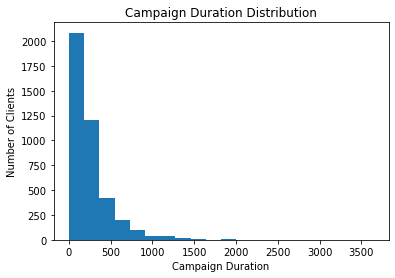

In [44]:
plt.hist(df.duration,bins=20)
plt.title('Campaign Duration Distribution')
plt.xlabel('Campaign Duration')
plt.ylabel('Number of Clients')

Text(0, 0.5, 'Number of Clients')

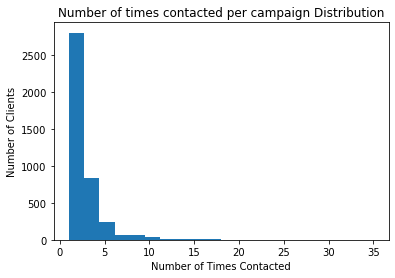

In [45]:
plt.hist(df.campaign,bins=20)
plt.title('Number of times contacted per campaign Distribution')
plt.xlabel('Number of Times Contacted')
plt.ylabel('Number of Clients')

In [48]:
job=df.job.groupby(df.job).count()

<BarContainer object of 12 artists>

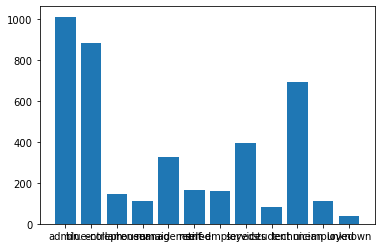

In [83]:
plt.bar(job.index,job.values)

In [51]:
marital=df.marital.groupby(df.marital).count()

<BarContainer object of 4 artists>

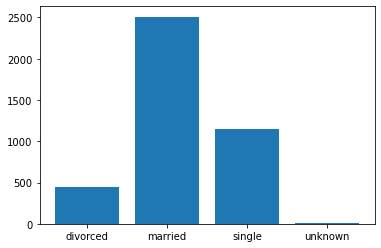

In [66]:
plt.bar(marital.index,marital.values)

In [53]:
education=df.education.groupby(df.education).count()

<BarContainer object of 8 artists>

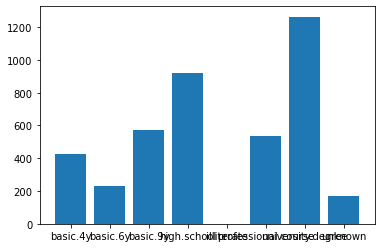

In [64]:
plt.bar(education.index,education.values)

In [62]:
default=df.default.groupby(df.default).count()

<BarContainer object of 3 artists>

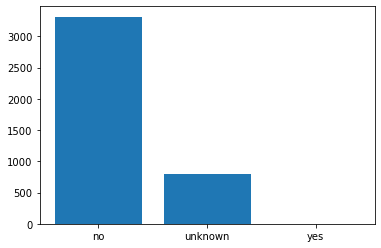

In [65]:
plt.bar(default.index,default.values)

In [68]:
housing=df.housing.groupby(df.housing).count()

<BarContainer object of 3 artists>

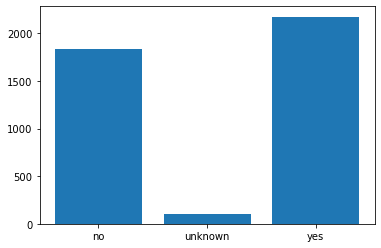

In [69]:
plt.bar(housing.index,housing.values)

In [70]:
loan=df.loan.groupby(df.loan).count()

<BarContainer object of 3 artists>

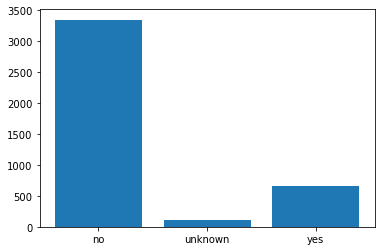

In [71]:
plt.bar(loan.index,loan.values)

In [72]:
contact=df.contact.groupby(df.contact).count()

<BarContainer object of 2 artists>

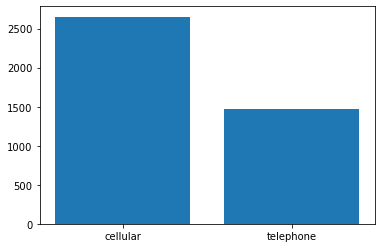

In [73]:
plt.bar(contact.index,contact.values)

In [75]:
month=df.month.groupby(df.month).count()

<BarContainer object of 10 artists>

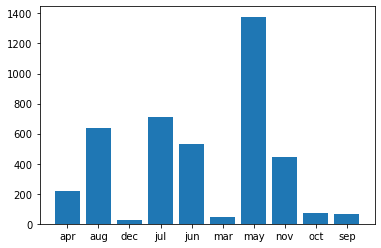

In [76]:
plt.bar(month.index,month.values)

In [79]:
day_of_week=df.day_of_week.groupby(df.day_of_week).count()

<BarContainer object of 5 artists>

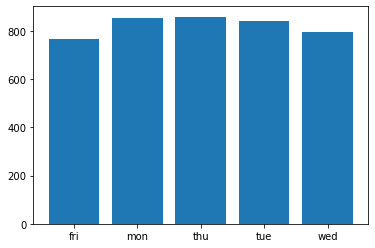

In [80]:
plt.bar(day_of_week.index,day_of_week.values)

In [81]:
y=df.y.groupby(df.y).count()

<BarContainer object of 2 artists>

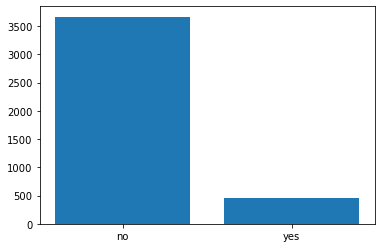

In [82]:
plt.bar(y.index,y.values)

In [86]:
month

month
apr     215
aug     636
dec      22
jul     711
jun     530
mar      48
may    1378
nov     446
oct      69
sep      64
Name: month, dtype: int64